In [1]:
# Importar bibliotecas
import json
import pandas as pd
import numpy as np

# WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Importar o módulo de classificaçao de sentimentos
from sent_classifier import SnorkelSentimentClassifier

pd.set_option('display.max_colwidth', None)

## Suno

In [2]:
# Definir o ticker e importar notícias
ticker = 'BBAS3'

In [3]:
# Verificar o dataset importado
with open(f'../crawlers/suno/results/suno-{ticker.lower()}.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df = pd.DataFrame(data)
df.sample(5)

,topic,title,date,search_date,url,tags
221,Mercado,"Ibovespa vira para fechar em queda de 0,78%, de volta aos 116 mil pontos",26/01/2021 18:25,2022-05-03 17:07:24,https://www.suno.com.br/noticias/ibovespa-vira-fecha-queda-116-mil-pontos/,"[Banco do Brasil (BBAS3), CTEEP (TRPL3/TRPL4), Eletrobras (ELET3/ELET5/ELET6), Ibovespa]"
354,Negócios,"Petros, Funcef e Previ vão assumir 3% do IRB Brasil",16/01/2020 09:50,2022-05-03 17:10:36,https://www.suno.com.br/noticias/petros-funcef-e-previ-vao-assumir-3-do-irb-brasil/,"[Banco do Brasil (BBAS3), Caixa Econômica Federal (CEF), IRB Brasil (IRBR3), Petrobras (PETR4)]"
46,Negócios,"Banco do Brasil (BBAS3): risco político ofusca potencial da ação, analisa Safra",30/08/2021 10:23,2022-05-03 17:04:54,https://www.suno.com.br/noticias/banco-do-brasil-bbas3-risco-politico-ofusca-potencial-da-acao-analisa-safra/,"[Banco do Brasil (BBAS3), Banco Safra]"
32,Negócios,Banco do Brasil (BBAS3): Governo escolhe Fausto Ribeiro como novo presidente,19/03/2021 07:42,2022-05-03 17:04:48,https://www.suno.com.br/noticias/banco-do-brasil-bbas3-andre-brando-fausto-ribeiro/,[Banco do Brasil (BBAS3)]
4,Negócios,"Radar: BB (BBAS3) divulga resultado e paga bilhões em dividendos, Tanure quer a BR Malls (BRML3), lucro da Itaúsa (ITSA4) avança",14/02/2022 22:41,2022-05-03 17:02:30,https://www.suno.com.br/noticias/radar-banco-do-brasil-bbas3-brmalls-brml3-itausa-itsa4/,"[B3 (B3SA3), Banco do Brasil (BBAS3), BRMalls (BRML3), Itaúsa (ITSA3/ITSA4), Via Varejo (VVAR3)]"


In [4]:
# Selecionar dados de 2020 - Presente

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

# Set date column as index
df.set_index('date', inplace=True)

# Order by date
df.sort_index(inplace=True)

In [5]:
# Filtrar notícias do tópico 'negócios' para a Suno
# Verificar o similar em MoneyTimes

df = df.loc['2020':,][df['topic'] == 'Negócios']

C:\Users\mathe\AppData\Local\Temp/ipykernel_2504/818035290.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.loc['2020':,][df['topic'] == 'Negócios']


In [6]:
sc = SnorkelSentimentClassifier(df=df, source='suno')

In [7]:
# Executar o módulo de classificação de sentimentos
df_results, results = sc.apply_rules(df)

100%|██████████| 1500/1500 [00:00<00:00, 1700.70epoch/s]


In [8]:
df_results.tail(10)

,title,title_raw,search_date,label_class
date,,,,
2022-02-19 11:38:00,dividendos do banco do brasil bbas3 cenário ruim para varejistas e nubank nubr33 dispara veja as notícias mais lidas da semana,"Dividendos do Banco do Brasil (BBAS3), cenário ruim para varejistas e Nubank (NUBR33) dispara: veja as notícias mais lidas da semana",2022-05-03 17:05:26,NEGATIVE
2022-02-25 19:47:00,banco do brasil bbas3 antecipa pagamento de jcp de <NUM> milhões veja valor por ação,Banco do Brasil (BBAS3) antecipa pagamento de JCP de R$ 601 milhões; veja valor por ação,2022-05-03 17:02:05,NEGATIVE
2022-03-04 17:28:00,após itaú itub4 e nubank nubr33 app do banco do brasil bbas3 apresenta instabilidade,"Após Itaú (ITUB4) e Nubank (NUBR33), app do Banco do Brasil (BBAS3) apresenta instabilidade",2022-05-03 17:05:05,NEUTRAL
2022-03-06 10:20:00,banco do brasil bbas3 itaú itub4 veja as datas de corte e quem vai pagar dividendos na semana,"Banco do Brasil (BBAS3), Itaú (ITUB4): Veja as datas de corte e quem vai pagar dividendos na semana",2022-05-03 17:04:35,POSITIVE
2022-03-07 12:12:00,banco do brasil bbas3 anuncia programa de demissão voluntária de <NUM> funcionários,Banco do Brasil (BBAS3) anuncia programa de demissão voluntária de 300 funcionários,2022-05-03 17:04:09,NEUTRAL
2022-03-24 20:38:00,brf bfrs3 disputa por poder no conselho esquenta com demanda da previ,BRF (BFRS3): Disputa por poder no conselho esquenta com demanda da Previ,2022-05-03 17:05:09,NEUTRAL
2022-03-27 10:00:00,metaverso o que as varejistas querem ao comprar terrenos na realidade virtual,Metaverso: o que as varejistas querem ao comprar terrenos na realidade virtual?,2022-05-03 17:03:37,POSITIVE
2022-04-17 10:00:00,veja <NUM> ações queridinhas dos gestores segundo a suno asset,"Veja 10 ações queridinhas dos gestores, segundo a Suno Asset",2022-05-03 17:03:03,NEGATIVE
2022-04-27 11:15:00,banco do brasil bbas3 prevê <NUM> bilhões em pedidos de crédito durante agrishow,Banco do Brasil (BBAS3) prevê R$ 2 bilhões em pedidos de crédito durante Agrishow,2022-05-03 17:05:26,NEUTRAL


In [9]:
df_results.label_class.value_counts()

NEUTRAL     193
NEGATIVE     53
POSITIVE     20
Name: label_class, dtype: int64

In [10]:
results

,j,Polarity,Coverage,Overlaps,Conflicts
lf_news_good_adjs,0,[1],0.067669,0.022556,0.000000
lf_happiness_words,1,[1],0.135338,0.041353,0.011278
lf_news_good_verbs,2,[1],0.048872,0.033835,0.000000
lf_regex_dividendos,3,[1],0.056391,0.045113,0.003759
lf_regex_resultado_positivo,4,[],0.000000,0.000000,0.000000
lf_news_bad_adjs,5,[0],0.018797,0.003759,0.000000
lf_sadness_words,6,[0],0.011278,0.007519,0.000000
lf_news_bad_verbs,7,[0],0.007519,0.003759,0.000000
lf_regex_resultado_negativo,8,[0],0.015038,0.011278,0.011278


---

### WordClouds

In [11]:
def generate_wordcloud(samples, sentiment, source):

    # Use a image as mask if source is twitter
    twitter_mask = np.array(Image.open("./wordclouds/twitter_mask.png"))

    # concatenar as palavras
    all_words = " ".join(s for s in samples)

    # ver quantidade de palavras
    print("Quantidade de Palavras: {}".format(len(all_words)))

    # lista de stopword
    stopwords = set(STOPWORDS)

    stopwords.update(["de", "e", "a", "um", "que", "com",
                    "só", "da", "do", "m", "a", "ou", "já",
                    "ok", "esse", "ma", "i", "mais", "mas",
                    "não", "meu", "pra", "eu", "uma", "um", 
                    "na", "no", "me", "tem", "em", "por",
                    "ele", "essa", "esse", "se", "vc", "para",
                    "vai", "muito", "minha", "meu", "ele", "ela",
                    "como", "sem", "tá", "dia", "você", "queria",
                    "aqui", "era", "as", "pq", "hoje", "seu", "gente", 
                    "nem", "como", "agora", "os", "quando", "foi", 
                    "isso", "casa", "ser", "ter", "cara", "vou", "NUM"])

    # gerar uma wordcloud
    wordcloud = WordCloud(stopwords=stopwords,
                        background_color="white",
                        max_words=1000,
                        mask=twitter_mask if source == 'twitter' else None,
                        width=1600, 
                        height=800,
                        contour_width=2,
                        collocations=False,
                        contour_color='#1da1f2').generate(all_words)

    # mostrar a imagem final
    fig, ax = plt.subplots(figsize=(15,10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()

    plt.imshow(wordcloud);
    
    # salvar a imagem final
    wordcloud.to_file(f"wordclouds/{source}_{sentiment}_wordcloud.png")

    plt.show();

#### Positive Suno

In [12]:
positive_samples = df_results[df_results['label_class'] == 'POSITIVE']['title'].tolist()

Quantidade de Palavras: 1925


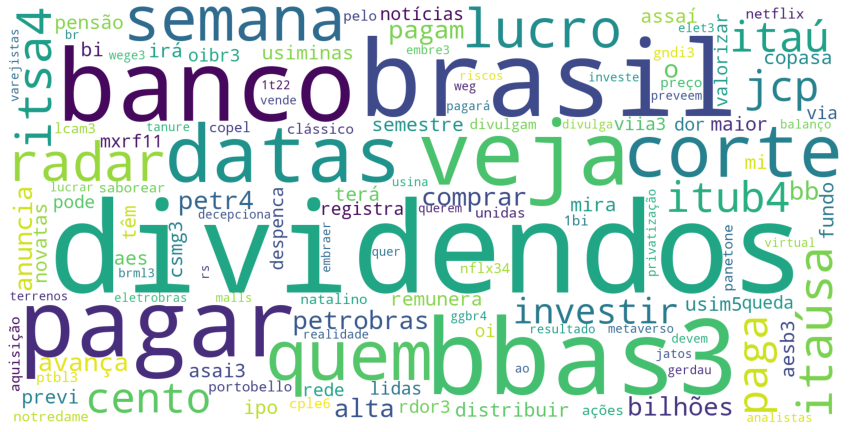

In [13]:
generate_wordcloud(positive_samples, 'positive', 'suno')

#### Negative Suno

In [14]:
negative_samples = df_results[df_results['label_class'] == 'NEGATIVE']['title'].tolist()

Quantidade de Palavras: 4131


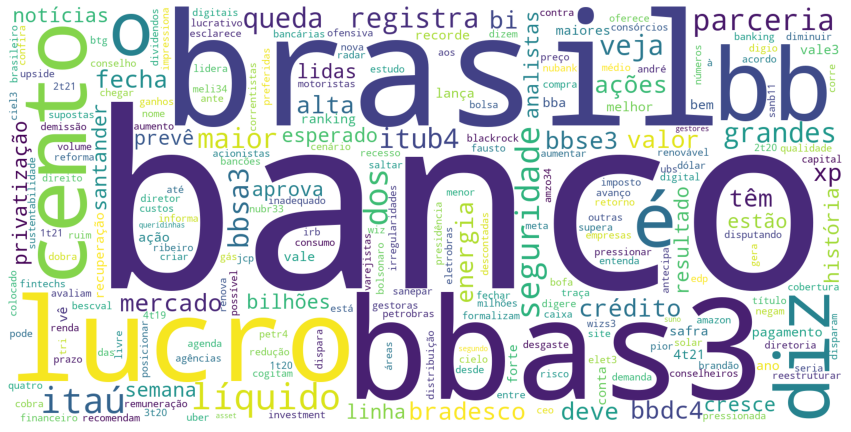

In [15]:
generate_wordcloud(negative_samples, 'negative', 'suno')

---

## Twitter

In [16]:
# Verificar o dataset importado
with open(f'../crawlers/twitter/results/B3_Oficial.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df = pd.DataFrame(data)
df.sample(5)

,tweet_id,created_at,search_dt,text,user_id,screen_name,rt_count,favorite_count
1152,1036684319035674626,2018-09-03 15:36:16,2022-05-03 14:17:46,Confira na íntegra o estudo e a agenda desenvolvidos em conjunto com a @ANBIMA_BR. Acesse: https://t.co/mCO8yETgwc #CongressoMercadodeCapitais #CongressoANBIMAB3B3 https://t.co/tld1yHGsL1,74550038,B3_Oficial,0,5
18,1516496342469783565,2022-04-19 16:17:57,2022-05-03 14:17:34,"A gestora Aberdeen estreiou hoje, aqui na B3, com o lançamento de dois BDRs de ETF de Renda Variável. Agora, os fundos geridos pela gestora podem ser negociados por investidores qualificados com o ticker SIVR39 e ABGD39. Saiba mais: https://t.co/Pfz8qgYUkB",74550038,B3_Oficial,0,15
1198,1026542653842677765,2018-08-06 15:56:55,2022-05-03 14:17:46,"Paulo Sousa, da #Cargill, menciona sustentabilidade, biotecnologia e infraestrutura como os 3 pilares do agronegócio brasileiro e reforça: ""é preciso atrair investimento externo, mas é fundamental que tenhamos impacto interno para explorar variedades aprovadas pelos brasileiros""",74550038,B3_Oficial,1,9
189,1471608937963270149,2021-12-16 19:31:26,2022-05-03 14:17:35,"O Futuro de Cupom IPCA, conhecido também como DAP, atingiu a marca de 1 milhão de contratos em aberto nesta semana. \n\nMas você sabe pra que este produto serve? \n\nConfira este - e outros acontecimentos - no #MinutoB3 💙 https://t.co/rupsgfcXBt",74550038,B3_Oficial,1,14
603,1314571464037859328,2020-10-09 11:20:35,2022-05-03 14:17:41,"Daqui a pouco começa a live ""Mercado Financeiro, visto por elas"" uma das iniciativas da Semana Mundial do Investidor, em parceria com a a B3, @CreditSuisse e @BTGPDigital ,que aborda esse assunto necessário. Hoje, dia 9/10 às 20h no Youtube da B3. https://t.co/U3GVEelYAm https://t.co/oB2x1bdVZ0",74550038,B3_Oficial,2,19


In [17]:
sc = SnorkelSentimentClassifier(df=df, source='twitter')

In [18]:
# Executar o módulo de classificação de sentimentos
df_results, results = sc.apply_rules(df)

100%|██████████| 1500/1500 [00:00<00:00, 1752.86epoch/s]


In [19]:
df_results.tail(10)

,title,title_raw,created_at,search_dt,rt_count,favorite_count,label_class
1373,cotas do fii hedgefof começam a ser negociadas na b3 saiba mais,Cotas do FII HEDGEFOF começam a ser negociadas na B3. Saiba mais: https://t.co/FpoGZ5gXRB,2018-03-01 14:08:21,2022-05-03 14:17:47,0,5,NEUTRAL
1374,b3 informa resultado da licitação da sinfra para concessão de prestação de serviços de rodovias estaduais de mato grosso saiba mais,B3 informa resultado da licitação da SINFRA para concessão de prestação de serviços de rodovias estaduais de Mato Grosso. Saiba mais: https://t.co/lUcn4dOu6D,2018-02-28 14:25:42,2022-05-03 14:17:47,1,1,NEGATIVE
1375,lançamento da versão em inglês do feed rss do suporte à negociação da b3 saiba mais,Lançamento da Versão em Inglês do Feed RSS do Suporte à Negociação da B3. Saiba mais: https://t.co/e8WtRrnYoZ,2018-02-27 19:49:22,2022-05-03 14:17:47,1,3,NEUTRAL
1376,emissão de coe em quatro anos superou o total de <NUM> bi saiba mais,Emissão de COE em quatro anos superou o total de R$ 31 bi. Saiba mais: https://t.co/kCI6IJy0Ak,2018-02-27 10:36:20,2022-05-03 14:17:47,2,1,POSITIVE
1377,breaks new record and reaches <NUM> points learn more,"#Ibovespa breaks new record and reaches 86,686 points. Learn more: https://t.co/Czbud69siy",2018-02-22 19:24:16,2022-05-03 14:17:47,4,13,NEUTRAL
1378,registra novo recorde e marca <NUM> pontos saiba mais,#Ibovespa registra novo recorde e marca 86.686 pontos. Saiba mais: https://t.co/G0BhcVd12y https://t.co/PkoC24jT1w,2018-02-22 19:23:28,2022-05-03 14:17:47,9,26,NEUTRAL
1379,breaks new record and reaches <NUM> points learn more,"#Ibovespa breaks new record and reaches 86,051 points. Learn more: https://t.co/hCrlClX9qH",2018-02-21 19:14:59,2022-05-03 14:17:47,0,3,NEUTRAL
1380,registra novo recorde e marca <NUM> pontos sais mais,#Ibovespa registra novo recorde e marca 86.051 pontos. Sais mais: https://t.co/WBiq4mVEg8,2018-02-21 19:14:30,2022-05-03 14:17:47,6,17,NEUTRAL
1381,breaks new record and reaches <NUM> points learn more,#Ibovespa breaks new record and reaches 85.803 points. Learn more: https://t.co/S86WJ1czu4,2018-02-20 20:22:08,2022-05-03 14:17:47,0,12,NEUTRAL
1382,registra novo recorde e marca <NUM> pontos saiba mais,#Ibovespa registra novo recorde e marca 85.803 pontos. Saiba mais: https://t.co/U5eiu7PRIV https://t.co/I2cmb2QRTz,2018-02-20 20:20:31,2022-05-03 14:17:47,7,29,NEUTRAL


In [20]:
# Convert date to datetime format
df_results['date'] = pd.to_datetime(df_results['created_at'], format='%Y-%m-%d %H:%M:%S')

# Set date column as index
df_results.set_index('created_at', inplace=True)

# Order by date
df_results.sort_index(inplace=True)

# Since 2020
df_results = df_results.loc['2020':,]

In [21]:
df_results.label_class.value_counts()

NEUTRAL     425
POSITIVE    291
NEGATIVE     30
Name: label_class, dtype: int64

In [22]:
results

,j,Polarity,Coverage,Overlaps,Conflicts
lf_news_good_adjs,0,[1],0.151844,0.080983,0.018800
lf_happiness_words,1,[1],0.161244,0.083153,0.015184
lf_news_good_verbs,2,[1],0.068691,0.036153,0.006508
lf_regex_dividendos,3,[1],0.000723,0.000000,0.000000
lf_regex_resultado_positivo,4,[1],0.010846,0.004338,0.002892
lf_news_bad_adjs,5,[0],0.042661,0.020246,0.018800
lf_sadness_words,6,[0],0.010846,0.006508,0.005061
lf_news_bad_verbs,7,[0],0.006508,0.002892,0.002892
lf_regex_resultado_negativo,8,[0],0.013738,0.005061,0.005061


### WordClouds

#### Positive Twitter

In [23]:
positive_samples = df_results[df_results['label_class'] == 'POSITIVE']['title'].tolist()

Quantidade de Palavras: 58990


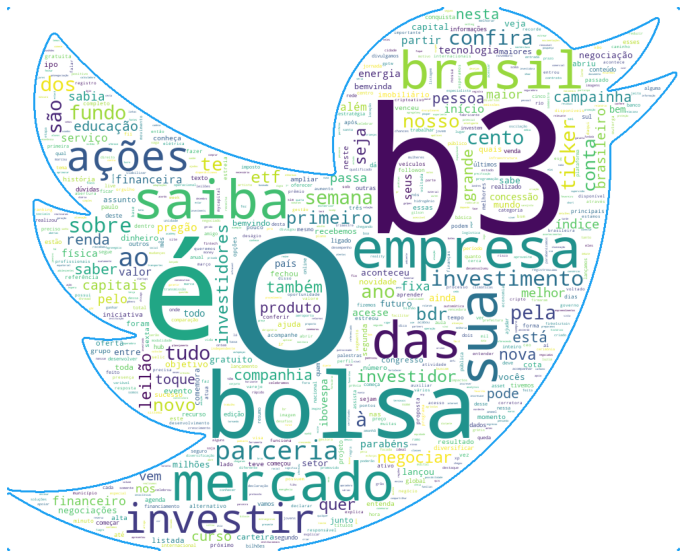

In [24]:
generate_wordcloud(positive_samples, 'positive', 'twitter')

#### Negative Twitter

In [25]:
negative_samples = df_results[df_results['label_class'] == 'NEGATIVE']['title'].tolist()

Quantidade de Palavras: 5851


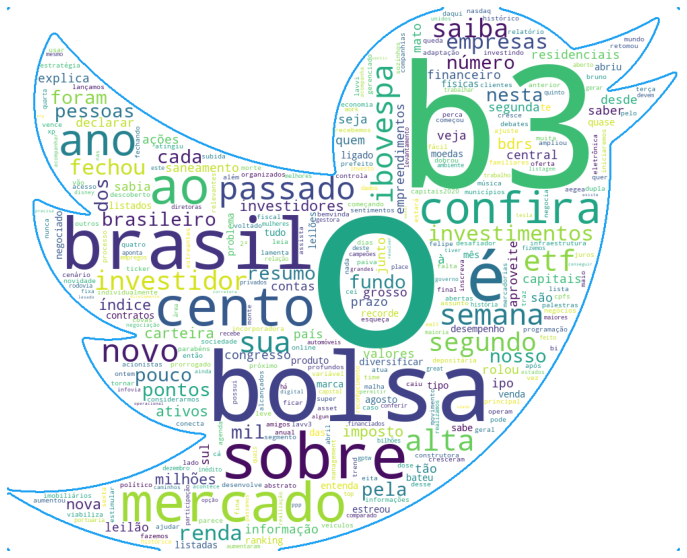

In [26]:
generate_wordcloud(negative_samples, 'negative', 'twitter')

---

## Aggregate Sentiment Scores

#### Using RTs e Favorite Count

In [27]:
df_results.head(2)

,title,title_raw,search_dt,rt_count,favorite_count,label_class,date
created_at,,,,,,,
2020-01-02 10:25:09,em mais um passo para estimular o desenvolvimento do mercado brasileiro a b3 reduz tarifas no mercado de ações saiba mais,"Em mais um passo para estimular o desenvolvimento do mercado brasileiro, a B3 reduz tarifas no mercado de ações. Saiba mais: https://t.co/fTxcc6wqYM",2022-05-03 14:17:43,31,181,NEUTRAL,2020-01-02 10:25:09
2020-01-06 13:52:12,b3 divulga a nova carteira do e demais índices,B3 divulga a nova carteira do #Ibovespa e demais índices: https://t.co/LcoC82C40r,2022-05-03 14:17:43,11,32,NEUTRAL,2020-01-06 13:52:12


In [28]:
# Set values to label classes
scores = {"POSITIVE" : 1,
          "NEUTRAL" : 0,
          "NEGATIVE" : -1}

df_results["label_value"] = df_results["label_class"].map(scores)

In [29]:
df_results.head(2)

,title,title_raw,search_dt,rt_count,favorite_count,label_class,date,label_value
created_at,,,,,,,,
2020-01-02 10:25:09,em mais um passo para estimular o desenvolvimento do mercado brasileiro a b3 reduz tarifas no mercado de ações saiba mais,"Em mais um passo para estimular o desenvolvimento do mercado brasileiro, a B3 reduz tarifas no mercado de ações. Saiba mais: https://t.co/fTxcc6wqYM",2022-05-03 14:17:43,31,181,NEUTRAL,2020-01-02 10:25:09,0.0
2020-01-06 13:52:12,b3 divulga a nova carteira do e demais índices,B3 divulga a nova carteira do #Ibovespa e demais índices: https://t.co/LcoC82C40r,2022-05-03 14:17:43,11,32,NEUTRAL,2020-01-06 13:52:12,0.0


In [30]:
# Compute scores per publication
df_results['sent_score'] = df_results['label_value'] * (10 * df_results['rt_count']) + df_results['favorite_count']

In [31]:
df_results.head(2)

,title,title_raw,search_dt,rt_count,favorite_count,label_class,date,label_value,sent_score
created_at,,,,,,,,,
2020-01-02 10:25:09,em mais um passo para estimular o desenvolvimento do mercado brasileiro a b3 reduz tarifas no mercado de ações saiba mais,"Em mais um passo para estimular o desenvolvimento do mercado brasileiro, a B3 reduz tarifas no mercado de ações. Saiba mais: https://t.co/fTxcc6wqYM",2022-05-03 14:17:43,31,181,NEUTRAL,2020-01-02 10:25:09,0.0,181.0
2020-01-06 13:52:12,b3 divulga a nova carteira do e demais índices,B3 divulga a nova carteira do #Ibovespa e demais índices: https://t.co/LcoC82C40r,2022-05-03 14:17:43,11,32,NEUTRAL,2020-01-06 13:52:12,0.0,32.0
